# Lending Club Case Study

### Key Question

Decipher which types of customers default on a loan.

Lending Club is a consumer finance company which specialises in lending various types of loans to urban customers.
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss).

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

The Analysis is divided into four main parts
1. Data Understanding
2. Data cleaning and Manipulation
3. Data Analysis
4. Recommendations

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

Let's see the data for further Analysis.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd

#visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data files

In [2]:
lend_df = pd.read_csv('loan.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_115208\585952266.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lend_df = pd.read_csv('loan.csv')


## Data Understanding

In [3]:
# view some top records
lend_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# view some bottom records
lend_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking datatypes of variables and total number of records
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# Checking all the columns available
lend_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
# Checking unique values of loan_status (Target vaiable) column
lend_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Following are some columns which are important:

- loan_status: shows the status of borrower's loan - whether its Fully Paid, 'Charged Off' or 'Current'.
This is our **target Variable**.
Here we want to see how other variables/ factors affects on the status of this column. So that in future Lending Club can be prepared in advance to judge a borrower.


- loan_amnt: Amount applied by the potential borrowers

- funded_amnt: Amount recommended/approved by Lending Club

- funded_amnt_inv: Amount funded by investors

- term: The number of payments on the loan (values are mentioned in months)    

## Data Cleaning

In [8]:
# Looking for duplicate values
lend_df.duplicated().sum()

0

In [9]:
# Looking for missing values
lend_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Here we can see many columns are having missing values in large numbers. Let's check the percentage of it.

In [10]:
# missing values percentages of individual columns
round((lend_df.isnull().sum()/len(lend_df.index))*100, 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

We can see that many columns are having 100% missing values. Lets see how many columns are there with 100% missing values

In [11]:
# checking number of columns and their names having 100% missing values
missing_value_col_100 = lend_df.columns[(lend_df.isnull().sum()/len(lend_df.index))*100 == 100]

print(missing_value_col_100)

print("\n \n Total number of columns with 100% missing values =", len(missing_value_col_100))

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

Columns with 100% missing values will not be useful for us that is why its better to drop them. 

In [12]:
#Dropping columns
lend_df = lend_df.drop(missing_value_col_100, axis=1)

In [13]:
# After dropping large number of columns checking remaining columns and their details
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# missing values percentages of remaining columns
round((lend_df.isnull().sum()/len(lend_df.index))*100, 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

There are still 4 columns with missing values (32%, 64%, 92% and 97%)
Its always better to drop the columns having missing values more than 25-30%, Because due to lack of information they do not provide sufficient information.


In [15]:
# Dropping remaining columns with missing values
missing_value_col = lend_df.columns[(lend_df.isnull().sum()/len(lend_df.index))*100 >30]

lend_df = lend_df.drop(missing_value_col, axis=1)

In [16]:
# Lets see the remaining columns & details and their missing value status.
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# Summarising missing values
(lend_df.isnull().sum()/len(lend_df.index))*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Now the time is to check missing values in rows

In [18]:
# missing values in rows
lend_df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

lets check whether some records are having missing values more than 5. Because records with maximum number of missing values will also not going to help us a lot to reach our goal.


In [19]:
# Checking records having more than 5 missing values
len(lend_df[lend_df.isnull().sum(axis=1) > 5])

0

Here we can see we do not need to worry about record missing values.

In [20]:
# Let's look at the datatype and details of the columns and records
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [21]:
# Checking unique values of interest rate column
lend_df.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

Here for interest rate column we can see the datatype is object whereas it should be of numeric type and values are also suffixed with '%' symbol. We need to remove this.

In [22]:
# Removing suffixed '%' symbol and converting int_rate column to float
lend_df['int_rate']= lend_df['int_rate'].apply(lambda x: float(x[:-1]))

In [23]:
# check columns datatypes
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [24]:
# Checking unique values of emp_length column
lend_df.emp_length.unique()    

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We can use just the numeric value from this column to represent the employment length of a person. We can use regular expression to extract the numeric value.
Along with this we can see some values are null here. So first let's drop those.

In [25]:
# Dropping null values from 'emp_length' column
lend_df = lend_df.dropna(axis=0, subset = ['emp_length'])

In [26]:
# checking unique values after dropping null values
lend_df.emp_length.unique() 

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [27]:
# After above operation let's check datatypes of available variables
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [28]:
# Extracting numbers from string using regular expression
import re
lend_df.emp_length=lend_df.emp_length.apply(lambda x: re.findall('\d+', str(x))[0])

In [29]:
# change datatype to numeric
lend_df.emp_length = lend_df.emp_length.apply(lambda x: pd.to_numeric(x))

In [30]:
# Checking details of available variables
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

Now we can see emp_length column's datatype has been changed to numeric.

## Data Analysis

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.

There are broadly 3 types of variables:

    1. Those which are related to the applicant(demographic variables such as age, occupation, employment details etc.)
    
    2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
    
    3. Customer behavior variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.)
    
Let's see the list of customer behavior variables first:


In [31]:
# list of all columns
lend_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [32]:
# list of customer behavior variables
cust_behave_var = ['delinq_2yrs',
                   'inq_last_6mths',
                   'open_acc',
                    'revol_bal',
                   'revol_util',
                    'out_prncp',
                   'out_prncp_inv',
                   'pub_rec',
                   'total_acc',
                    'total_pymnt',
                    'total_pymnt_inv',
                    'total_rec_prncp',
                    'total_rec_int',
                    'total_rec_late_fee',
                    'recoveries',
                    'collection_recovery_fee',
                    'last_pymnt_d',
                    'last_pymnt_amnt',
                    'chargeoff_within_12_mths',
                    'earliest_cr_line',
                  'last_credit_pull_d']

In [33]:
# checking list of customer behavior column
print(cust_behave_var)

['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'chargeoff_within_12_mths', 'earliest_cr_line', 'last_credit_pull_d']


Now, the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

In [34]:
# Dropping customer behavior variables
lend_df = lend_df.drop(cust_behave_var, axis =1)

In [35]:
# list of all remaining columns
lend_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

There are some variables relevant to applicant like title and some like url are also not relevant for our purpose. Let's drop them as well

In [36]:
# Dropping some variables which are not relevant
lend_df = lend_df.drop(['title', 'zip_code', 'url', 'addr_state', 'id', 'member_id', 'pub_rec_bankruptcies', 'tax_liens', 'pymnt_plan'], axis = 1)

In [37]:
# list of all remaining columns
lend_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

Let's have a look at the target variable now i.e. loan_status

The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans.

In [38]:
# Looking for Unique values of column 'loan_status' 
lend_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [39]:
# Counting records of individual status from loan_status column
lend_df.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

We can see the number for Fully Paid is greater.
Here Current status means its neither fully paid or charged off. So we can get rid of it.

In [40]:
# Remove records with loan_status as 'Current'
lend_df = lend_df[lend_df['loan_status'] != 'Current']

In [41]:
# Looking for Unique values of column 'loan_status' 
lend_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Now we can see we have only two values as loan_status. loan_status is a categorical variable now.


In [42]:
# Change type of loan_status variable to category
lend_df.loan_status = lend_df.loan_status.astype('category')

In [43]:
# checking details of data we have
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   37544 non-null  int64   
 1   funded_amnt                 37544 non-null  int64   
 2   funded_amnt_inv             37544 non-null  float64 
 3   term                        37544 non-null  object  
 4   int_rate                    37544 non-null  float64 
 5   installment                 37544 non-null  float64 
 6   grade                       37544 non-null  object  
 7   sub_grade                   37544 non-null  object  
 8   emp_title                   36136 non-null  object  
 9   emp_length                  37544 non-null  int64   
 10  home_ownership              37544 non-null  object  
 11  annual_inc                  37544 non-null  float64 
 12  verification_status         37544 non-null  object  
 13  issue_d         

<!-- We can tag remaining 2 values of loan_status as 0 and 1.
0 : Fully Paid
1 : Charged Off -->

In [44]:
# looking for loan_status unique values
lend_df.loan_status.unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']

In [45]:
# check datatypes of available variables
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   37544 non-null  int64   
 1   funded_amnt                 37544 non-null  int64   
 2   funded_amnt_inv             37544 non-null  float64 
 3   term                        37544 non-null  object  
 4   int_rate                    37544 non-null  float64 
 5   installment                 37544 non-null  float64 
 6   grade                       37544 non-null  object  
 7   sub_grade                   37544 non-null  object  
 8   emp_title                   36136 non-null  object  
 9   emp_length                  37544 non-null  int64   
 10  home_ownership              37544 non-null  object  
 11  annual_inc                  37544 non-null  float64 
 12  verification_status         37544 non-null  object  
 13  issue_d         

In [46]:
# Summaring missing values
lend_df.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     1408
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
dti                              0
initial_list_status              0
collections_12_mths_ex_med      56
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
dtype: int64

## Outlier Treatment

Let's analyze following few numerical variables one by one which could possibly have outliers using box plots.

1. annual_inc
2. dti
3. loan_amnt
4. funded_amnt_inv

<Axes: >

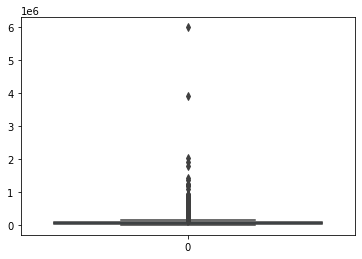

In [47]:
# checking outlier for annual_inc column
sns.boxplot(lend_df['annual_inc'])


Here, clearly we can see that outliers are present.
We need to find the threshold for removing outliers.
Let's see the quantile info:

In [48]:
# checking quantile information
quantile_info = lend_df.annual_inc.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.99])
quantile_info

0.50     60000.0
0.75     83000.0
0.90    116672.4
0.95    142000.0
0.97    166213.0
0.99    235000.0
Name: annual_inc, dtype: float64

The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
let's consider threshold is 0.95

In [49]:
# Getting rid of values above threshold of 0.95
annual_inc_per_95 = lend_df['annual_inc'].quantile(0.95)
lend_df = lend_df[lend_df.annual_inc <= annual_inc_per_95]

<Axes: >

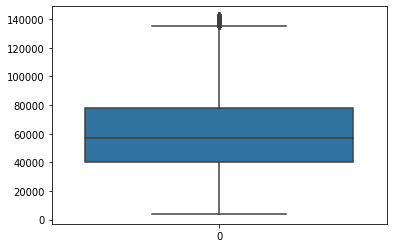

In [50]:
# plot a boxplot to see the result of removing outliers
sns.boxplot(lend_df['annual_inc'])

<Axes: >

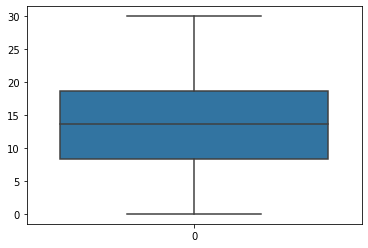

In [51]:
# checking outlier for dti column
sns.boxplot(lend_df['dti'])


Here we can see the distibution is fair and no outliers in dti column

<Axes: >

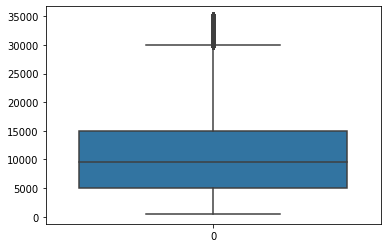

In [52]:
# checking outlier for loan_amnt column
sns.boxplot(lend_df['loan_amnt'])

Here we can see some outliers in loan_amnt column. Let's see the quantile distribution also:

In [53]:
# checking quantile information
quantile_info = lend_df.loan_amnt.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.99])
quantile_info

0.50     9500.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25795.0
0.99    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

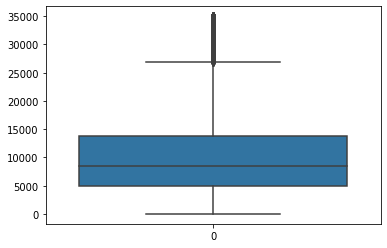

In [54]:
# checking outlier for funded_amnt_inv column
sns.boxplot(lend_df['funded_amnt_inv'])

Here we can see some outliers in funded_amnt_inv column. Let's see the quantile distribution also:

In [55]:
# checking quantile information
quantile_info = lend_df.funded_amnt_inv.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.99])
quantile_info

0.50     8412.208039
0.75    13749.998585
0.90    19770.806164
0.95    23950.050847
0.97    24975.000000
0.99    31981.500000
Name: funded_amnt_inv, dtype: float64

There are some values which are far from the distribution but the distribution is continuous that is why no need to remove these values.

In [56]:
# Checking details of available variables
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35675 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   35675 non-null  int64   
 1   funded_amnt                 35675 non-null  int64   
 2   funded_amnt_inv             35675 non-null  float64 
 3   term                        35675 non-null  object  
 4   int_rate                    35675 non-null  float64 
 5   installment                 35675 non-null  float64 
 6   grade                       35675 non-null  object  
 7   sub_grade                   35675 non-null  object  
 8   emp_title                   34430 non-null  object  
 9   emp_length                  35675 non-null  int64   
 10  home_ownership              35675 non-null  object  
 11  annual_inc                  35675 non-null  float64 
 12  verification_status         35675 non-null  object  
 13  issue_d         

## Visualizing Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

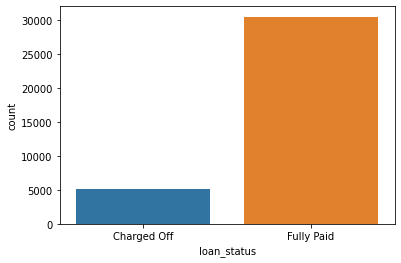

In [57]:
sns.countplot(x = 'loan_status', data = lend_df)

In [58]:
# Counting records with individual status from loan_status
lend_df['loan_status'].value_counts()

Fully Paid     30479
Charged Off     5196
Name: loan_status, dtype: int64

In [59]:
# Fully Paid rate
round(len(lend_df[lend_df['loan_status']=='Fully Paid'])/ len(lend_df['loan_status']), 2)

0.85

In [60]:
# default rate
round(len(lend_df[lend_df['loan_status']=='Charged Off'])/ len(lend_df['loan_status']), 2)

0.15

We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for **'Charged Off'** loan_status for below plots

In [61]:
# function to plot loan_status across all available categorical variables
def plotsToCompare(cat_var):
    sns.countplot(x = cat_var, data = lend_df[lend_df.loan_status == 'Charged Off'])

In [62]:
# Checking unique values for column purpose
lend_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [63]:
# Checking unique values for grade column
lend_df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

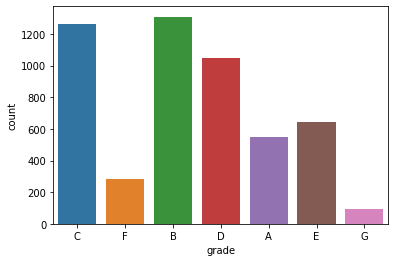

In [64]:
# Comparing default rates against grade column using countplot
plotsToCompare('grade')

We can see grade B & C has many defaulters.

To see more in detail for every grade we have sub_grade column as well. Lets visuzlize using those

In [65]:
# unique values of sub_grade
lend_df.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [66]:
# let's extact the numeric value from sub_grade column
lend_df.sub_grade = lend_df.sub_grade.apply(lambda x: x[-1])

# Convert sub_grade column to integer
lend_df.sub_grade = lend_df.sub_grade.astype('int64')

In [67]:
# After operation now let's check unique values of sub_grade
lend_df.sub_grade.unique()

array([2, 4, 5, 1, 3], dtype=int64)

<Axes: xlabel='grade', ylabel='count'>

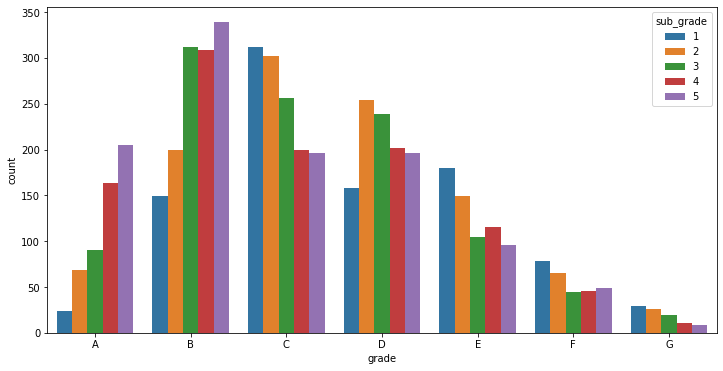

In [68]:
# plot loan_status across all grades and sub_grades

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = lend_df[lend_df.loan_status == 'Charged Off'])

Here if we look at Grade A and its sub_grade then A1 is better than A2 and so on

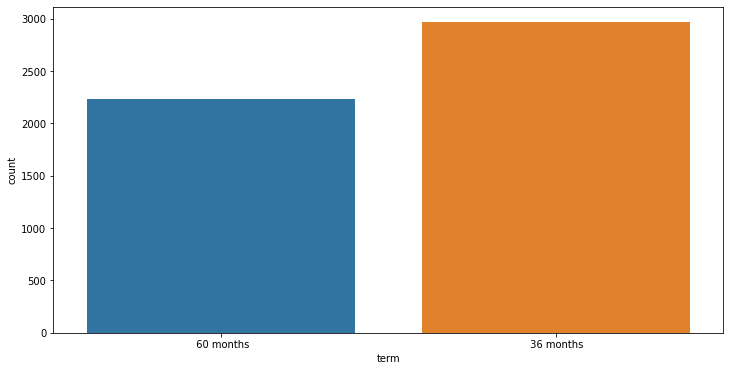

In [69]:
# Comparing default rates against term column using countplot
fig, ax = plt.subplots(figsize=(12,6))
plotsToCompare('term')

There are more defaulters for 60 months loan than 36 months.

In [70]:
# Analysis home_ownership column
# unique values of home_ownership column

lend_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [71]:
# Counting records with individual value from home_ownership column
lend_df.home_ownership.value_counts()

RENT        17638
MORTGAGE    15289
OWN          2652
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

Here there are only 3 NONE values. We will replace it with OTHER for ease.

In [72]:
# Replacing 'NONE' with 'OTHER'
lend_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [73]:
# after value replacement, let's check total value count
lend_df.home_ownership.value_counts()

RENT        17638
MORTGAGE    15289
OWN          2652
OTHER          96
Name: home_ownership, dtype: int64

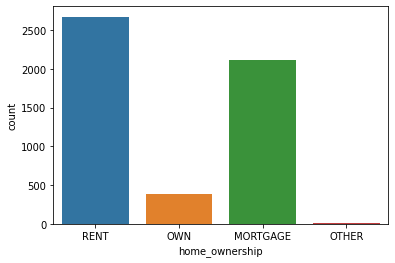

In [74]:
# Loan status Vs home_ownership
plotsToCompare('home_ownership')

Here defaulters are more for whom home ownership is 'RENT'

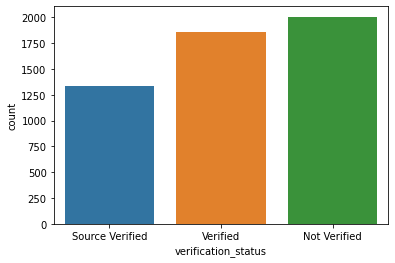

In [75]:
# Loan status Vs verification_status
plotsToCompare('verification_status')

There are maximum defaulters for whom verification has not been done. Source verification has become the fruitful to reduce this number compare to Not verified.

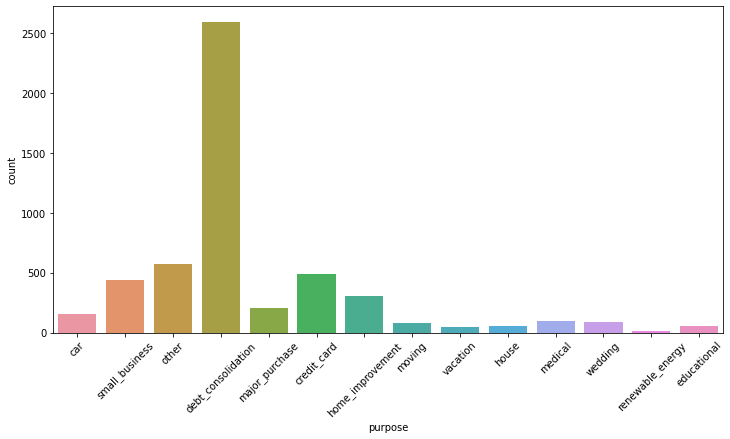

In [76]:
# Analyse purpose against loan_status
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
plotsToCompare('purpose')


There are more defaulters who has mentioned there purpose for loan as debt_consolidation

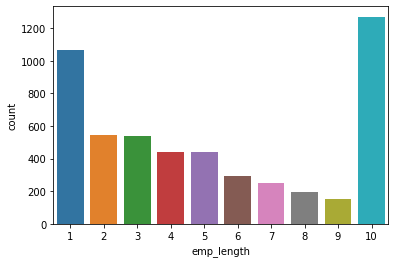

In [77]:
# Analyse emp_length against loan_status
plotsToCompare('emp_length')

More defaulters are the people who are employed 10 or more than 10 years.
There are slight less number of defaulters are from the group where people are employed for 1 year.


### Analysis using numerical variables as categorical variables

We can convert numerical variables into categorical using bins for the purpose of analysis. We will use here following columns:

    1. int_rate
    2. annual_inc
    3. installment
    4. funded_amnt_inv
    5. loan_amnt
    6.dti

In [78]:
# Creating bins for int_rate & annual_inc
lend_df['int_rate_groups'] = pd.cut(lend_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
lend_df['annual_inc_groups'] = pd.cut(lend_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
lend_df['installment_groups'] = pd.cut(lend_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lend_df['funded_amnt_inv_group'] = pd.cut(lend_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
lend_df['loan_amnt_groups'] = pd.cut(lend_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lend_df['dti_groups'] = pd.cut(lend_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [79]:
# Viewing new bins created
lend_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,delinq_amnt,int_rate_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,NaN,10,...,1,INDIVIDUAL,0,0,9%-13%,3k-31k,145-274,0-5k,0-5k,24-30
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,1,...,1,INDIVIDUAL,0,0,13%-17%,3k-31k,14-145,0-5k,0-5k,0-6
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,NaN,10,...,1,INDIVIDUAL,0,0,13%-17%,3k-31k,14-145,0-5k,0-5k,6-12
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10,...,1,INDIVIDUAL,0,0,13%-17%,31k-58k,274-403,5k-10k,5k-10k,18-24
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,Veolia Transportaton,3,...,1,INDIVIDUAL,0,0,5%-9%,31k-58k,145-274,0-5k,0-5k,6-12


### Analyzing interest rate wrt the interest rate bins created

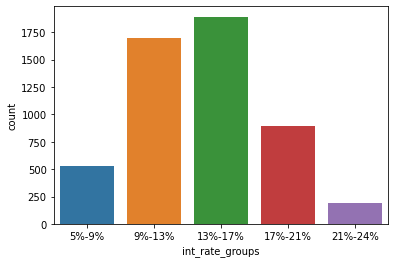

In [80]:
# interest rate wrt interest rate bins
plotsToCompare('int_rate_groups')

We can see maximum defaulters are those who has recieved the loan with interest rates approximately in between 9%-13% and 13%-17%

### Analyzing annual income wrt the annual income bins created

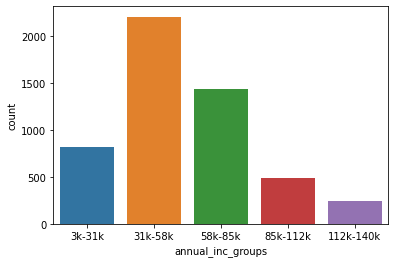

In [81]:
# annual income wrt the annual income bins
plotsToCompare('annual_inc_groups')

There are many defaulters whose annual income lies in the range of 31k-85k

### Analyzing installments wrt the installment bins created

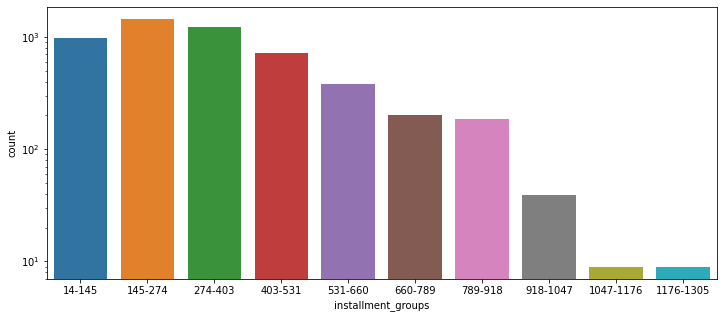

In [82]:
# installments wrt the installment bins
fig,ax = plt.subplots(figsize = (12,5))
# we will use log scale on y axis
ax.set_yscale('log')
plotsToCompare('installment_groups')

### Analyzing funded_amnt_inv wrt the funded_amnt_inv bins created

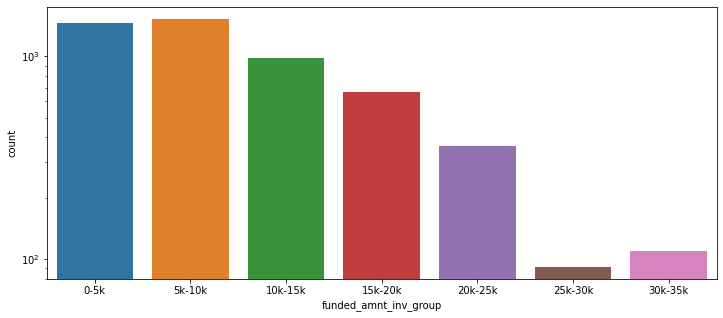

In [83]:
# funded_amnt_inv wrt the funded_amnt_inv bins
fig,ax = plt.subplots(figsize = (12,5))
# we will use log scale on y axis
ax.set_yscale('log')
plotsToCompare('funded_amnt_inv_group')

### Analyzing loan_amnt wrt the loan_amnt bins created

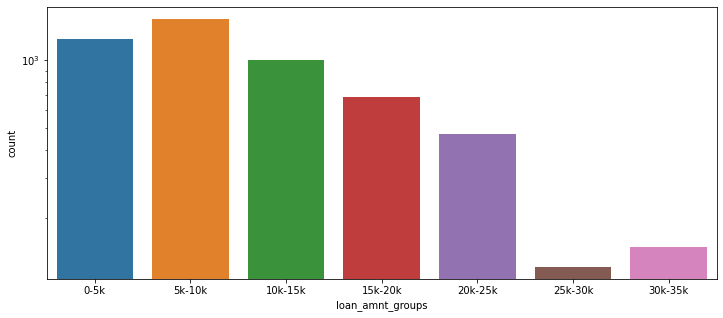

In [84]:
#  loan_amnt wrt the loan_amnt bins
fig,ax = plt.subplots(figsize = (12,5))
# we will use log scale on y axis
ax.set_yscale('log')
plotsToCompare('loan_amnt_groups')

### Analyzing dti wrt the dti bins created

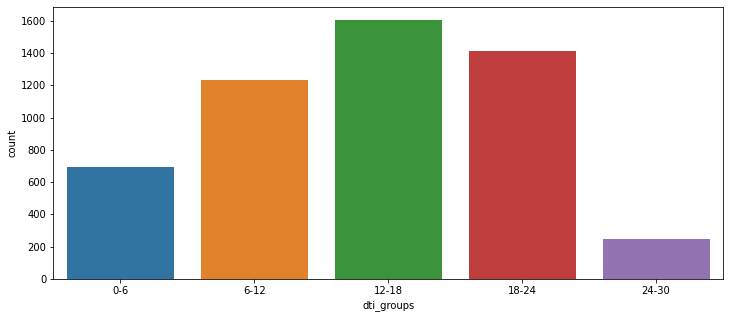

In [85]:
# dti wrt the dti bins 
fig,ax = plt.subplots(figsize = (12,5))
plotsToCompare('dti_groups')

### Now we will observe the distribution of loans across years



In [86]:
# We can get month and year from the column - 'issue_d'
lend_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [87]:
# Change 'issue_d' column's datatype from object to datetime
from datetime import datetime
lend_df['issue_d'] = lend_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [88]:
# check datatypes of variables
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35675 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   35675 non-null  int64         
 1   funded_amnt                 35675 non-null  int64         
 2   funded_amnt_inv             35675 non-null  float64       
 3   term                        35675 non-null  object        
 4   int_rate                    35675 non-null  float64       
 5   installment                 35675 non-null  float64       
 6   grade                       35675 non-null  object        
 7   sub_grade                   35675 non-null  int64         
 8   emp_title                   34430 non-null  object        
 9   emp_length                  35675 non-null  int64         
 10  home_ownership              35675 non-null  object        
 11  annual_inc                  35675 non-null  float64   

In [89]:
# extracting month and year from issue_d column
lend_df['month'] = lend_df['issue_d'].apply(lambda x: x.month)
lend_df['year'] = lend_df['issue_d'].apply(lambda x: x.year)

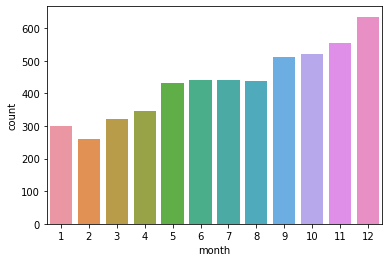

In [90]:
# loan_status Vs Month
plotsToCompare('month')

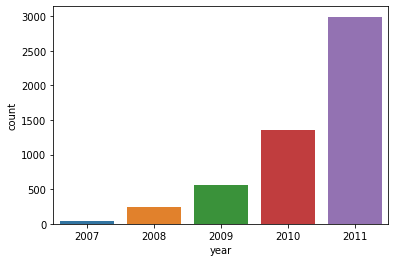

In [91]:
# loan_status Vs year
plotsToCompare('year')

We can see that default rate is increasing year by year but a sudden increase is there for the year 2011. and there are more defaulters whose loan is sanctioned in the month of December


## Observation and recommendation

The above analysis with respect to the charged off loans for each variable suggests the following. so that Lending Club can consider these factors before approving any loans.


- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

## Analysing annual income with other columns for more insights

In [92]:
# Function for univariate analysis
def analyseTwoVar(y_var, x_var):
    plt.figure(figsize=(10,10))
    sns.barplot(data =lend_df,x=x_var, y=y_var, hue ='loan_status')
    

### 1. Annual income vs loan purpose

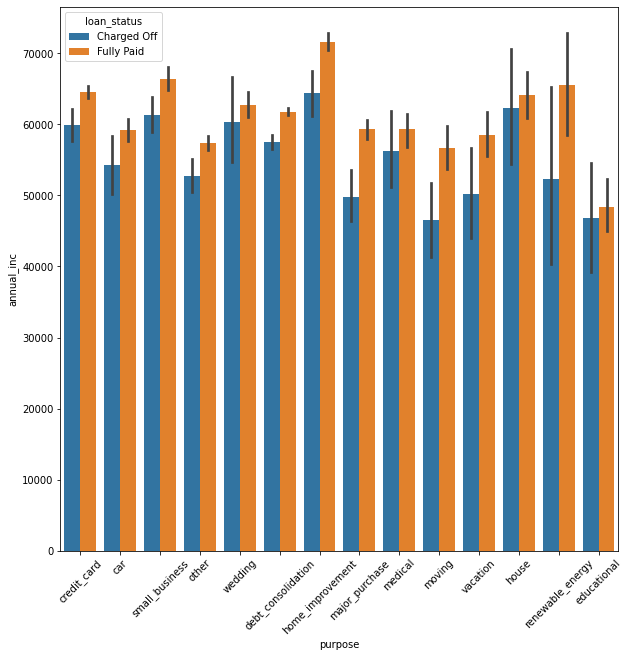

In [93]:
# Annual income vs loan purpose
analyseTwoVar('annual_inc', 'purpose')
plt.xticks(rotation=45)
plt.show()

Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

and though the number of defaulters are highest whose purpose for loan was debt_consolidation, there annual income is not highest.

### 2. Annual income vs home ownership

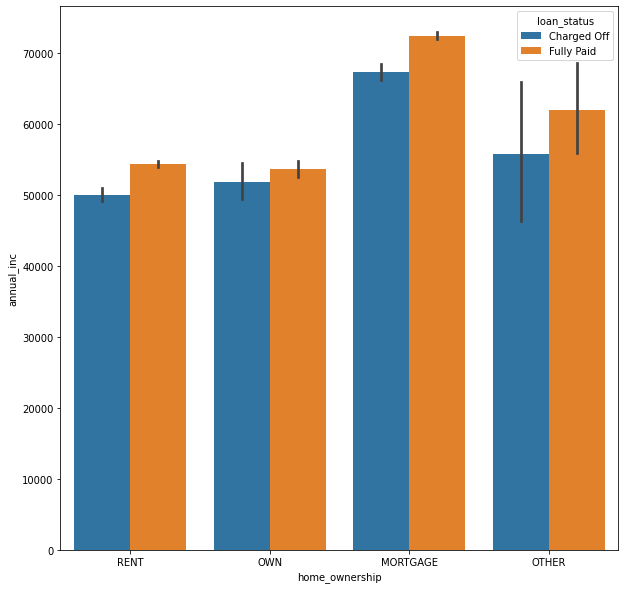

In [94]:
# Annual income vs home ownership
analyseTwoVar('annual_inc', 'home_ownership')

Annual income of defaulters is highest whose home_ownership is MORTGAGE.

### 3. Annual income vs loan amount

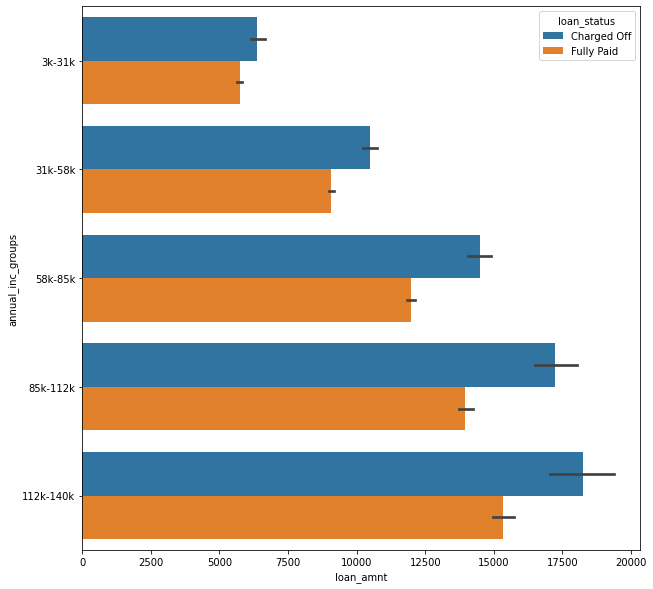

In [95]:
# Annual income vs loan amount
analyseTwoVar('annual_inc_groups', 'loan_amnt')

Here we can see for all annual income groups defaulters are having higher loan amount. As the loan amount is increasing defaulter rate is also increasing.

### 4. Annual income vs interest rate

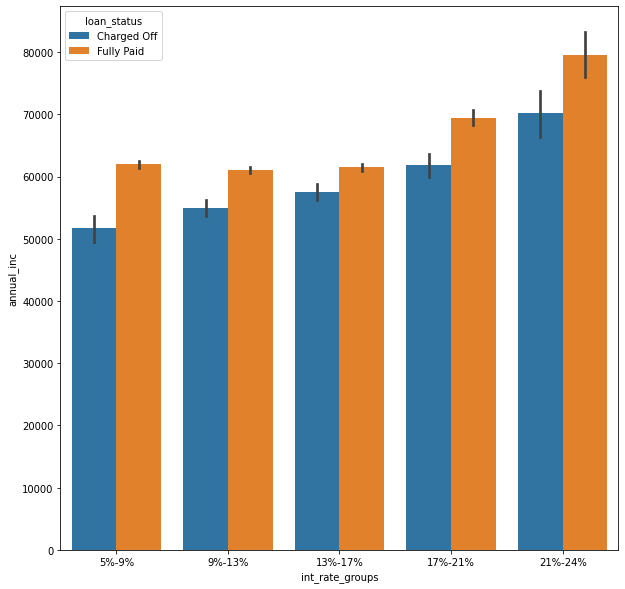

In [96]:
#  Annual income vs interest rate
analyseTwoVar('annual_inc','int_rate_groups')

## Analysing loan_amount with other columns for more insights

### 1.Loan Amount vs Interest Rate

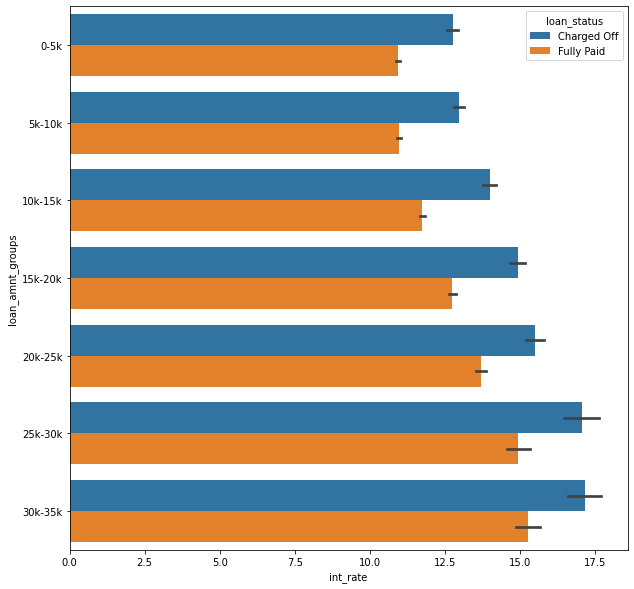

In [97]:
# Loan Amount vs Interest Rate
analyseTwoVar( 'loan_amnt_groups', 'int_rate')

As loan amount is increasing, interest rate is also increasing and defaulter rate as well along with this. 

The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. This can be a pretty strong driving factor for loan defaulting

### 2. Loan amount vs Loan purpose

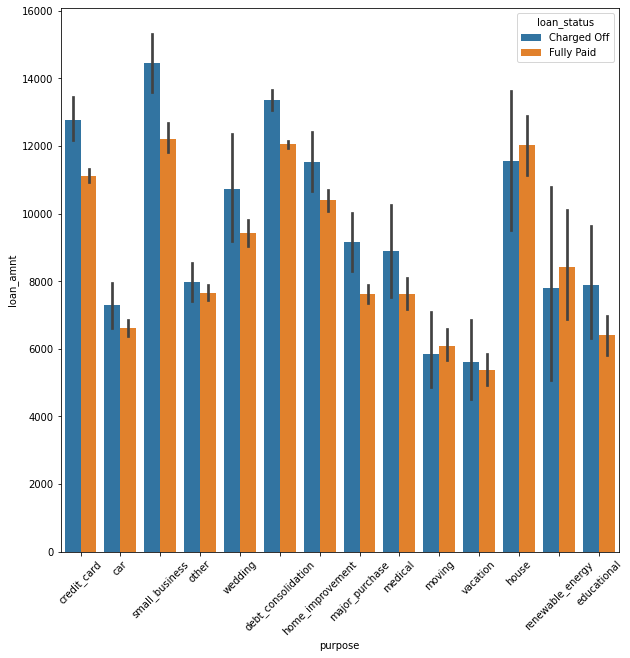

In [98]:
# Loan amount vs Loan purpose
analyseTwoVar('loan_amnt', 'purpose')
plt.xticks(rotation=45)
plt.show()

Defaulters have mentioned the purpose for loan is small_business, received the highest loan amount.

### 3. Loan Amount vs House Ownership

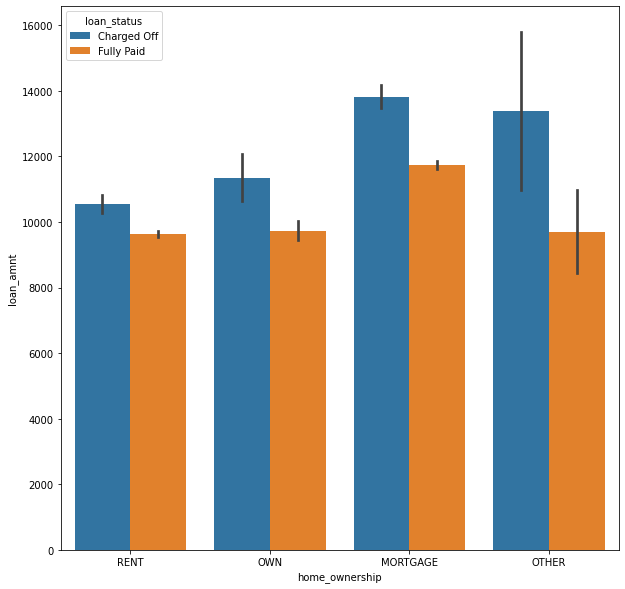

In [99]:
# Loan Amount vs House Ownership
analyseTwoVar( 'loan_amnt', 'home_ownership')

We have seen that highest number of defaulters has home_ownership status as RENT but the one whose status is MORTAGAGE has received or avail the highest loan amount.

### 4. Loan amount vs month issued and year issued

<Axes: xlabel='month', ylabel='loan_amnt'>

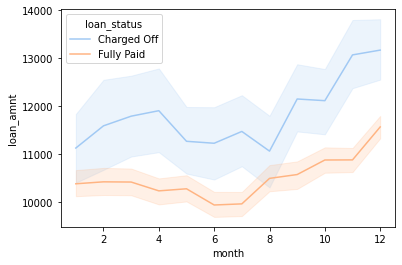

In [100]:
# Loan amount vs loan issued month 
sns.lineplot(data =lend_df,y='loan_amnt', x='month', hue ='loan_status',palette="pastel")

We have seen we were having highest number of defaulters in December month and here we can also see that loan amount issued in month of december is also highest.


<Axes: xlabel='year', ylabel='loan_amnt'>

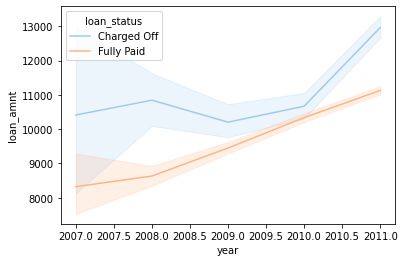

In [101]:
# Loan amount vs loan issued year
sns.lineplot(data =lend_df,y='loan_amnt', x='year', hue ='loan_status',palette="pastel")

We have seen we were having highest number of defaulters in the year 2011 and here we can also see that loan amount issued in year 2011 is also highest.


### 5. Loan amount vs Grade

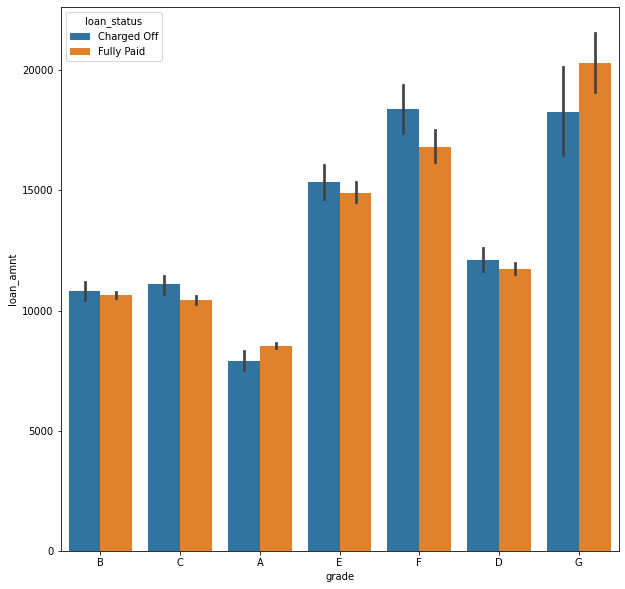

In [102]:
# Loan amount vs Grade
analyseTwoVar('loan_amnt', 'grade')

Defaulters with grade F & G have received highest loan amount.

### 6. Loan amount vs emp_length

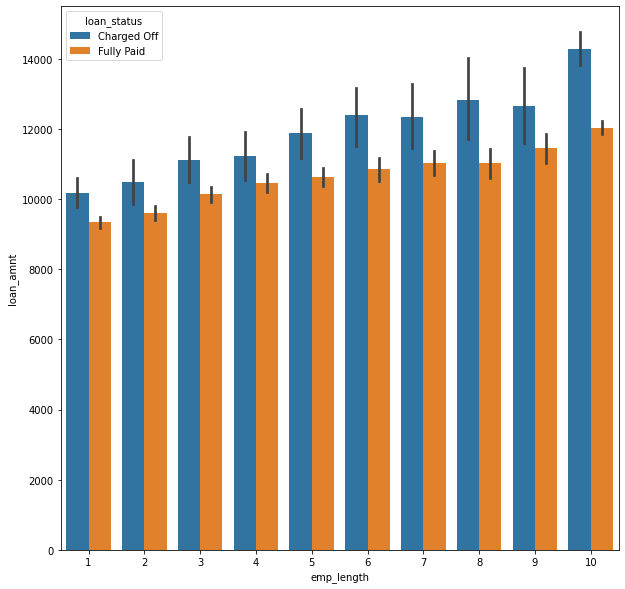

In [103]:
# Loan amount vs emp_length
analyseTwoVar('loan_amnt', 'emp_length')

Employees with longer work experience are receiving higher loan_amnt.

### 7. Loan amount vs verification_status

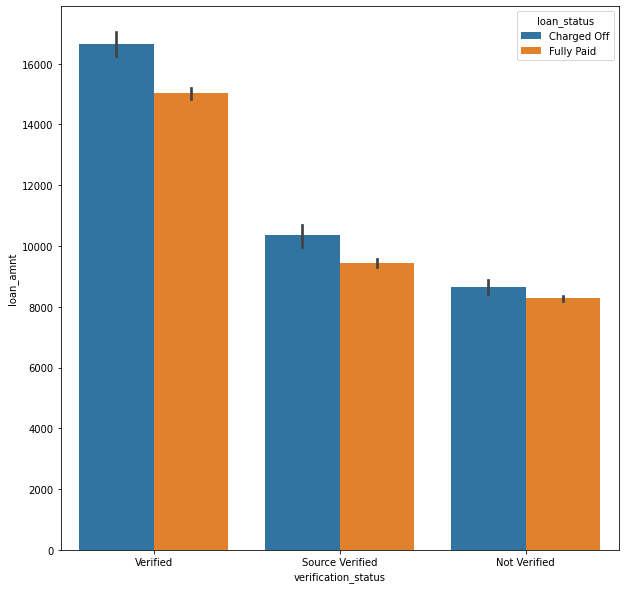

In [104]:
# Loan amount vs verification_status
analyseTwoVar('loan_amnt', 'verification_status')

verified loan applications tend to have higher loan amount, which might indicate that the firms are first verifying the loans with higher values.

### 8. Loan amount vs term

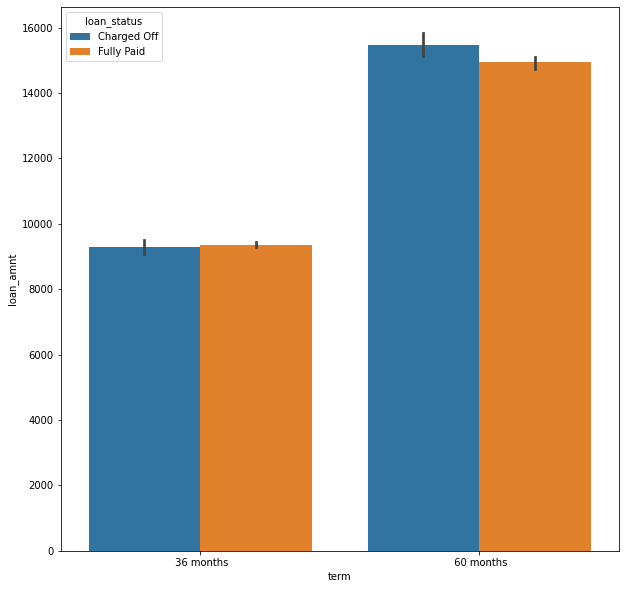

In [105]:
# Loan amount vs term
analyseTwoVar('loan_amnt', 'term')

Applicants who has fully paid the loan_amount and defaulted have no significant difference in loan_amounts.
Applicants applying for long term has applied for more loan.

## Analysing grade with interest rate

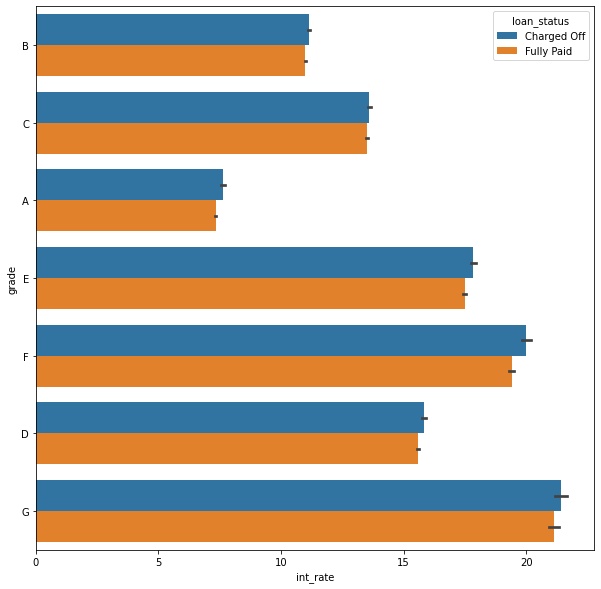

In [106]:
# Analysing grade with interest rate
analyseTwoVar('grade', 'int_rate')

when we go from grade A to F, we can see there is increase in the number of interest rate.

## Observations and recommendation

The above analysis with respect to the charged off loans suggests the following. so that Lending Club can consider these factors before approving any loans.

- The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%